The goal of this notebook is to replicate the process done during the FastAI cource to perform image recognition.  We will be evaluating whether or not we can train a model to detect if an image of a maze has been distorted to some effect. 

In [18]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [61]:
from fastcore.all import *
import os
from fastai.vision.all import *

In [21]:
! pwd

/kaggle/working


In [23]:
path = os.path.relpath("/kaggle/input/grids-and-mazes/data/")
files = os.listdir(path)

In [24]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))

In [25]:
path = os.path.relpath("/kaggle/working")

In [26]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.211375,0.511377,0.271429,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.957121,0.381340,0.200000,01:47
1,0.817786,0.215573,0.057143,01:47
2,0.701555,0.068704,0.000000,01:46


In [29]:
learn.export('/kaggle/working/model.pkl')

In [30]:
import ipywidgets as widgets

In [52]:
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [54]:
if str(uploader) == """FileUpload(value={}, description='Upload')""":
    pass
else:
    img = PILImage.create(uploader.data[0])
    identification,_,probs = learn.predict(img)

    print(f"Probability it is a Maze: {probs[1].item():.6f}")

Probability it is a Maze: 0.000000


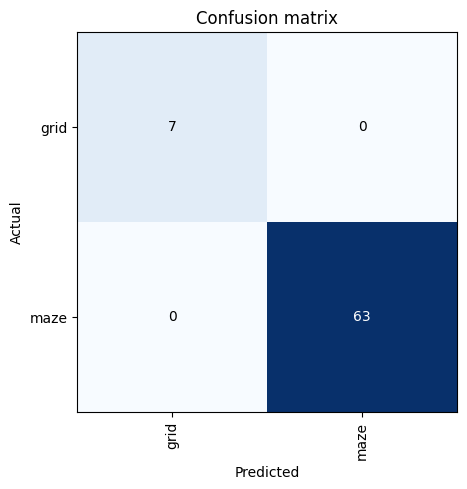

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

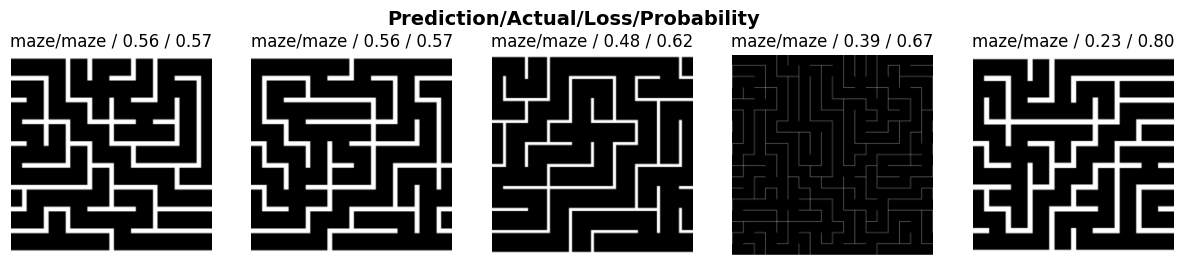

In [57]:
interp.plot_top_losses(5, nrows=1)

In [62]:
learn_inf.dls.vocab

NameError: name 'learn_inf' is not defined